In [1]:
import re
import csv
import tensorflow as tf
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers


2023-06-08 18:00:52.982374: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 18:00:53.216110: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-08 18:00:54.162035: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/fahrialmd/catkin_ws/devel/lib:/opt/ros/noetic/lib:/usr/local/cuda-11.8/lib64:/usr

In [2]:
# Read Dataset
train_dataset = pd.read_csv('./Data/Gejala_Penyakit_Train.csv')
test_dataset = pd.read_csv('./Data/Gejala_Penyakit_Test.csv')

In [3]:
# Data Preparation 
# Split Data fitur/gejala (x) dan label/penyakit (y)
cols_train= train_dataset.columns
cols_train= cols_train[:-1]
cols_test= test_dataset.columns
cols_test= cols_test[:-1]
x_train = train_dataset[cols_train]
y_train = train_dataset['Prognosis']
x_test = test_dataset[cols_test]
y_test = test_dataset['Prognosis']


In [4]:
label_encoder = LabelEncoder()
# Fit label encoder and return encoded labels.
y_train = label_encoder.fit_transform(y_train)
# Transform labels to normalized encoding.
y_test = label_encoder.transform(y_test)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(len(cols_train),)), # Ada 118 kelas gejala
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(set(y_train)), activation='softmax') # Ada 47 kelas penyakit
])

model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=600, batch_size=32, verbose=1, validation_data=(x_test, y_test))

2023-06-08 18:00:57.463036: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


Epoch 1/600
15/15 [==============================] - 1s 12ms/step - loss: 3.7906 - accuracy: 0.0737 - val_loss: 3.6278 - val_accuracy: 0.4043
Epoch 2/600
15/15 [==============================] - 0s 3ms/step - loss: 3.5017 - accuracy: 0.4842 - val_loss: 3.3193 - val_accuracy: 0.6596
Epoch 3/600
15/15 [==============================] - 0s 3ms/step - loss: 3.1089 - accuracy: 0.6547 - val_loss: 2.8367 - val_accuracy: 0.7660
Epoch 4/600
15/15 [==============================] - 0s 3ms/step - loss: 2.5158 - accuracy: 0.7600 - val_loss: 2.1862 - val_accuracy: 0.8511
Epoch 5/600
15/15 [==============================] - 0s 2ms/step - loss: 1.8133 - accuracy: 0.8800 - val_loss: 1.5073 - val_accuracy: 0.9362
Epoch 6/600
15/15 [==============================] - 0s 3ms/step - loss: 1.1556 - accuracy: 0.9684 - val_loss: 0.9663 - val_accuracy: 0.9787
Epoch 7/600
15/15 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.9874 - val_loss: 0.6049 - val_accuracy: 1.0000
Epoch 8/600


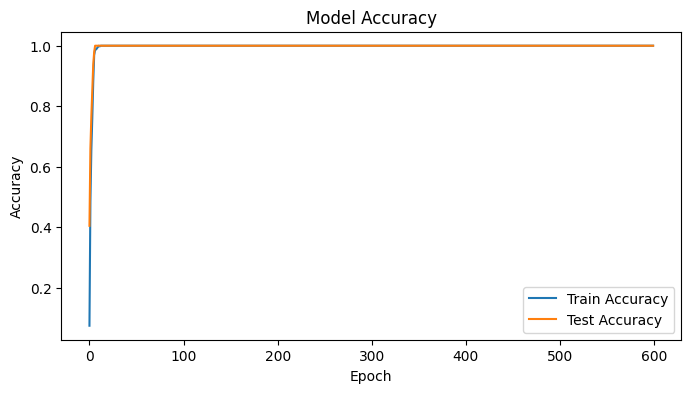

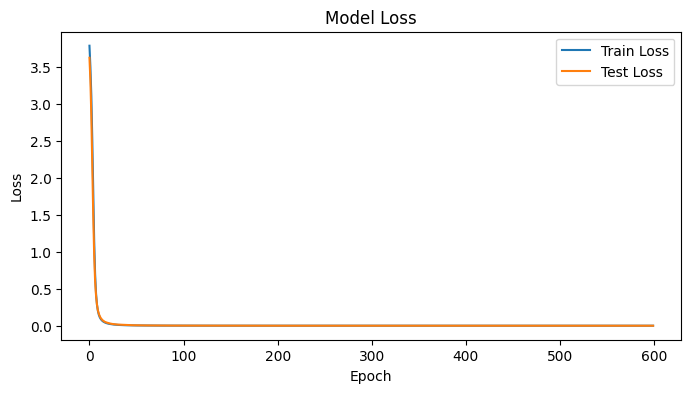

In [9]:
# # Evaluate Model to testing dataset
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print('Test accuracy:', test_acc)
# print('Test loss:', test_loss)

# Extract accuracy and loss values from the training history
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
test_accuracy = history.history['val_accuracy']
test_loss = history.history['val_loss']


# Plot accuracy curves
plt.figure(figsize=(8, 4))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss curves
plt.figure(figsize=(8, 4))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
# Try Predict to X_test data samples
# new_samples = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

new_samples = x_test[:5]
predictions = model.predict(new_samples)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes = label_encoder.inverse_transform(predicted_classes)  # Mengembalikan label penyakit ke bentuk semula
print('Predicted classes:', predicted_classes)

1/1 [==============================] - 0s 51ms/step
Predicted classes: ['Hipersomnia' 'Insomnia' 'Jet Lag' 'Bintitan' 'Katarak']


In [8]:

# Save the vectorizer and label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

# Load the saved model
saved_model_path = "./diseasePredict.h5"
model.save(saved_model_path)
